In [1]:
import numpy as np
from numpy.random import default_rng
from typing import Tuple
import matplotlib.pyplot as plt
from MY_RANSAC import ransac,data,line
import scipy

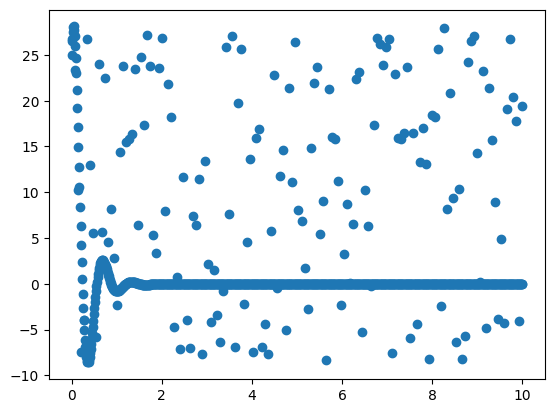

In [8]:
rng = default_rng()
p_gen = data.Point_Generator(1000,0.15)
X,y = p_gen.generate_case(
    k = np.random.uniform(-10,10),
    b= np.random.uniform(-5,5),
    eps=0.15,_case_="complex_1")
poly_degree = 5
plt.scatter(X,y)

[-0.00029073 -0.00086368 -0.00245988 -0.00636135 -0.01235606  0.0046394 ]


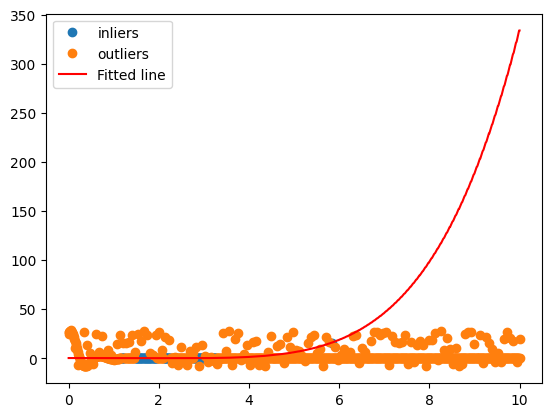

In [10]:
Line = line.Line(x=X,y=y,degree=poly_degree)
Line.estimate_params()
Line.get_params()
inliers_x, inliers_y, outliers_x, outliers_y = Line.devide_points(X, y, eps = 0.1)
params = Line.get_params() 
print(params)

plt.plot(inliers_x, inliers_y, 'o', label='inliers')
plt.plot(outliers_x, outliers_y, 'o', label='outliers')
x_out = np.linspace(X.min(),X.max(),X.shape[0])
y_out =  np.fromfunction(lambda i, j: np.sort(X)[i,] ** j, (X.shape[0], poly_degree+1), dtype=int) @ params
plt.plot(x_out, y_out, 'r', label='Fitted line')
plt.legend()
plt.show()

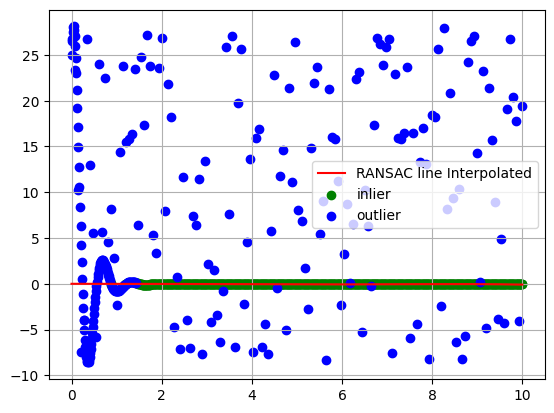

RANSAC.score: 0.734


In [11]:
Ransac =  ransac.RANSAC()
case_params = {'x': X, 'y': y,"iter_num":750,"poly_degree":poly_degree}
Ransac.set_case(case_params)
Ransac.fit()
Ransac.draw()
print(f"RANSAC.score: {Ransac.score}")

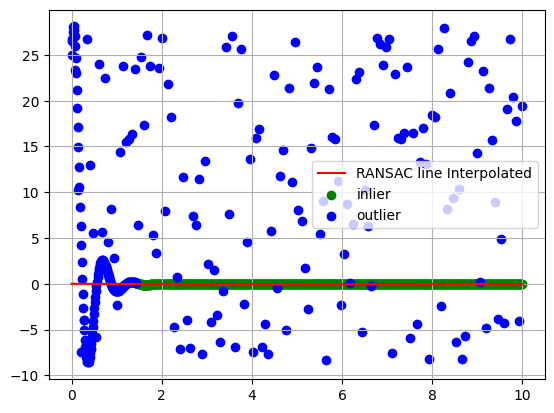

RANSAC.score: 0.734


In [12]:
Ransac =  ransac.RANSAC()
case_params ={'x': X, 'y': y,"poly_degree":poly_degree, 'n_pointsy': 5,"iter_num":750}
Ransac.set_case(case_params)
Ransac.fit()
Ransac.draw()
print(f"RANSAC.score: {Ransac.score}")